<a href="https://colab.research.google.com/github/Nikitha1418/INFO5731/blob/master/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you understand topic modeling better as well as how to visualize topic modeling results, aims to collect the human meanings of documents. Based on the yelp review data (only the review text will be used for this question), which can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0, **select two models** and write a python program to **identify the top 20 topics (with 15 words for each topic) in the dataset**. Before answering this question, please review the materials in lesson 8, as well as the introduction of these models by the links provided.

(1)   Labeled LDA (LLDA): https://github.com/JoeZJH/Labeled-LDA-Python

(2)   Biterm Topic Model (BTM): https://github.com/markoarnauto/biterm

(3)   HMM-LDA: https://github.com/dongwookim-ml/python-topic-model

(4)   SupervisedLDA: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(5)   Relational Topic Model: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(6)   LDA2VEC: https://github.com/cemoody/lda2vec

(7)   BERTopic: https://github.com/MaartenGr/BERTopic

(8)   LDA+BERT Topic Modeling: https://www.kaggle.com/dskswu/topic-modeling-bert-lda

(9)   Clustering for Topic models: (paper: https://arxiv.org/abs/2004.14914), (code: https://github.com/adalmia96/Cluster-Analysis)


**The following information should be reported:**

(1) Top 20 clusters for topic modeling.

(2) Summarize and describe the topic for each cluster. 

(3) Visualize the topic modeling reasults by using pyLDAVis: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#14.-pyLDAVis


# **Data Reading**

In [31]:
# Write your code here
  
from zipfile import ZipFile  
# specifying the zip file name 
files='/data.zip'

In [32]:
import glob
import json

files = glob.glob('/content/*.json')

reviews = list()
ratings = list()

for i in files:
  with open(i,encoding="utf-8") as j:
    data = json.load(j)
    for k in data:
      reviews.append(k['text'])
      ratings.append(k['stars'])

import pandas as pd


df = pd.DataFrame(reviews,columns = ["Reviews"])
df["Ratings"] = ratings
df

,Reviews,Ratings
0,Brought them 4 knives that have been heavily n...,5.0
1,Everyone should see the strip at least once. I...,4.0
2,I'm really impressed with Resident Culture. Th...,5.0
3,This is hands down the worst sushi in Chandler...,1.0
4,Why doesn't Yelp let you do half stars?\nI wou...,4.0
...,...,...
195795,Bonne bouffe. Service courtois. Prix très réso...,4.0
195796,Great place to get your lunch-time pho fix. Or...,4.0
195797,The foot massage was better than you could eve...,5.0
195798,We went there for brunch and the experience wa...,1.0


# **Data Cleaning**

In [ ]:
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]','')
stop = stopwords.words('english')
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
def lemmatization(reviewTokens, allowed_pos=['NOUN', 'ADJ', 'VERB', 'ADV']):
    lemma = []
    for tokens in reviewTokens:
        doc = nlp(" ".join(tokens)) 
        lemma.append([token.lemma_ for token in doc if token.pos_ in allowed_pos])
    return lemma

In [ ]:
from nltk.tokenize import word_tokenize
import gensim.corpora as corpora
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

def prpeare_dictionary_corpus(lemmatized_review):
  id2word = corpora.Dictionary(lemmatized_review)
  corpus = [id2word.doc2bow(review) for review in lemmatized_review]
  return id2word, corpus

tokens = []
for i in df['Reviews']:
  tokens.append(word_tokenize(i))

In [ ]:
after_lemma = lemmatization(tokens, allowed_pos=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
dictionary, corpus =  prpeare_dictionary_corpus(after_lemma)

In [ ]:
print([[(dictionary[x], freq) for x, freq in value] for value in corpus[:1]])

[[('back', 1), ('basic', 1), ('exciting', 1), ('experience', 1), ('extremely', 1), ('find', 1), ('first', 1), ('fun', 1), ('glad', 1), ('gun', 1), ('helpful', 1), ('patient', 1), ('place', 1), ('put', 1), ('real', 1), ('recommendation', 1), ('show', 1), ('skill', 1), ('staff', 1), ('test', 1), ('thank', 1), ('use', 1), ('yelper', 1)]]


# **LDA**

In [ ]:
from gensim.models import LdaModel
number_of_topics = 20
lda_model = LdaModel(corpus, num_topics = number_of_topics, id2word=dictionary,passes=20,chunksize = 100)

In [ ]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.061*"special" + 0.048*"cheap" + 0.048*"dog" + 0.043*"nail" + '
  '0.040*"choose" + 0.039*"regular" + 0.033*"believe" + 0.027*"hand" + '
  '0.026*"pool" + 0.016*"large"'),
 (1,
  '0.037*"good" + 0.029*"food" + 0.023*"place" + 0.022*"try" + 0.020*"great" + '
  '0.018*"chicken" + 0.015*"order" + 0.015*"sauce" + 0.015*"also" + '
  '0.014*"fresh"'),
 (2,
  '0.076*"area" + 0.051*"shop" + 0.033*"game" + 0.023*"disappointed" + '
  '0.021*"local" + 0.019*"plenty" + 0.019*"appreciate" + 0.017*"variety" + '
  '0.014*"play" + 0.013*"downtown"'),
 (3,
  '0.117*"great" + 0.058*"recommend" + 0.044*"love" + 0.037*"place" + '
  '0.034*"service" + 0.032*"highly" + 0.029*"hair" + 0.028*"town" + '
  '0.024*"food" + 0.022*"selection"'),
 (4,
  '0.032*"burger" + 0.032*"ice" + 0.030*"sweet" + 0.025*"cream" + 0.025*"top" '
  '+ 0.024*"share" + 0.019*"patio" + 0.017*"side" + 0.017*"set" + '
  '0.014*"chip"'),
 (5,
  '0.084*"room" + 0.048*"stay" + 0.036*"hotel" + 0.023*"night" + 0.020*"book" '
  '+ 0.

# **LDA Topics**

Topic 0 : Good and cheap place to choose with large pool

Topic 1 : Great place for food and try fresh chicken sause 

Topic 2 : Downtown has a plenty shops to play 

Topic 3 : Great service highly recommend the place 

Topic 4 : Burger patio and icecream was good 

Topic 5 : Hotel room was good and bathroom was clean

Topic 6 : Restaurant service is good

Topic 7 : Business class purchase gave phone card 

Topic 8 : Store manager was rude 

Topic 9 : Parking was crowded with people smoking but excellent tea place 

Topic 10: Chinese place was quite authentic and pizza delivered fast

Topic 11: Good place to go and pretty nice bar

Topic 12: Kid like french pie

Topic 13: Service was very good would recommend to vist 

Topic 14: A very convenient and unique place with good flavours

Topic 15: Staff and owner are freindly and accommodation was good 

Topic 16: Welcome item provided was terrible

Topic 17: Great staff and the job good 

Topic 18: Wonderful place to get coffee and good massage corner 

Topic 19: Quick view doctor was professional

# **pyLDAvis Visualization**

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=06acd20bde8dc65743458d4385fabafadaeb423df37bc0db0185f1d30a46a346
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

# **LSA**

In [ ]:
def create_gensim_lsa_model(dictionary,corpus,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    lsamodel = LsiModel(corpus, num_topics=number_of_topics, id2word = dictionary)  # train model
    pprint(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [ ]:
def compute_coherence_values_lsa(dictionary, corpus, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(corpus, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    print(coherence_values)
    return model_list, coherence_values

In [ ]:
def plot_graph(dictionary, corpus, doc_clean,start, stop, step):
    model_list, coherence_values_lsa = compute_coherence_values_lsa(dictionary, corpus, doc_clean, stop, start, step)
    x = range(start, stop, step)
    print(x)
    print(coherence_values_lsa)
    plt.plot(x, coherence_values_lsa)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [ ]:
# LSA Model
from gensim.models import LsiModel
number_of_topics = 20
words = 10
model = create_gensim_lsa_model(dictionary, corpus, number_of_topics, words)

[(0,
  '0.268*"go" + 0.240*"good" + 0.231*"get" + 0.220*"place" + 0.205*"food" + '
  '0.203*"time" + 0.199*"come" + 0.197*"would" + 0.181*"order" + 0.136*"say"'),
 (1,
  '-0.412*"good" + -0.340*"food" + 0.253*"call" + 0.204*"would" + 0.204*"tell" '
  '+ 0.203*"say" + -0.187*"place" + 0.181*"go" + -0.164*"great" + '
  '-0.120*"order"'),
 (2,
  '-0.535*"order" + 0.323*"place" + -0.245*"food" + 0.220*"great" + 0.215*"go" '
  '+ -0.209*"come" + 0.192*"good" + 0.181*"room" + -0.133*"restaurant" + '
  '-0.128*"table"'),
 (3,
  '0.553*"good" + -0.405*"go" + -0.336*"place" + -0.322*"food" + 0.276*"would" '
  '+ -0.186*"great" + 0.129*"call" + -0.121*"time" + 0.098*"really" + '
  '-0.082*"wait"'),
 (4,
  '0.555*"place" + -0.543*"go" + 0.294*"would" + -0.257*"get" + -0.249*"good" '
  '+ 0.186*"come" + -0.156*"time" + 0.141*"room" + 0.120*"call" + '
  '0.093*"great"'),
 (5,
  '-0.480*"great" + -0.401*"food" + -0.382*"service" + 0.347*"place" + '
  '0.217*"go" + 0.205*"order" + -0.130*"call" + -0.

# **LSA Topics**

Topic 0: Good place and order comes on time 

Topic 1: Great place to order food online

Topic 2: Restaurant rooms are good 

Topic 3: Good food and worth waiting for food

Topic 4: great place to vist and room are clean

Topic 5: Customer service is very good 

Topic 6: About the room and food

Topic 7: About the hotel

Topic 8: About restaurant and room

Topic 9: Good place to vist and spend time

Topic 10: Hotel stay was good 

Topic 11: About Room service and food 

Topic 12: Car Service 

Topic 13: Restaurant service was good and food was on time

Topic 14: Good place to drink and nice service 

Topic 15: Drinks and food are very food 

Topic 16: Great service 

Topic 17: Would be back on time 

Topic 18: Good place to vist and have drinks 

Topic 19: Really love the store

# **Question 2: Yelp Review Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.

The data can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0 

The data was saved in json format, here is an example of the data (for this task, you only need to use the star rating and the review text fields):

{
    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0
}

The sentiment of can be accessed based on the star rating, if no star information avaliable for a record, just remove that record. Detail star and sentiment level can be matched blew:

Very positive = 5 stars

Positive = 4 stars

Neutral = 3 stars

Negative = 2 stars

Very negative = 1 star

Here is code for yelp data preprocessing: https://github.com/Yelp/dataset-examples. 

Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can. 

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [35]:
import glob
import json

files = glob.glob('/content/*.json')

reviews = list()
ratings = list()

for i in files:
  with open(i,encoding="utf-8") as j:
    data = json.load(j)
    for k in data:
      reviews.append(k['text'])
      ratings.append(k['stars'])

import pandas as pd


df = pd.DataFrame(reviews,columns = ["Reviews"])
df["Ratings"] = ratings
df.head(10)

,Reviews,Ratings
0,Brought them 4 knives that have been heavily n...,5.0
1,Everyone should see the strip at least once. I...,4.0
2,I'm really impressed with Resident Culture. Th...,5.0
3,This is hands down the worst sushi in Chandler...,1.0
4,Why doesn't Yelp let you do half stars?\nI wou...,4.0
5,Badass Decor. Incredible Salsa. Great serv...,4.0
6,Amazing!! I had a small last minute wedding an...,5.0
7,OMG where to begin.....we booked a car about a...,1.0
8,Jenny did a great job! Appointment ran as sche...,5.0
9,siempre he ido flamingo para el 90 porciento d...,1.0


# **Data Cleaning**

In [ ]:
nltk.download('wordnet')
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Classification**

In [36]:
def classification(value):
    if value == 1:
      return 'very negative'
    elif value == 2:
      return 'negative'
    elif value == 3:
      return 'neutral'
    elif value == 4:
      return 'positive'
    elif value == 5:
      return 'very positive'

df['Sentiment'] = df['Ratings'].map(classification)
df

,Reviews,Ratings,Sentiment
0,Brought them 4 knives that have been heavily n...,5.0,very positive
1,Everyone should see the strip at least once. I...,4.0,positive
2,I'm really impressed with Resident Culture. Th...,5.0,very positive
3,This is hands down the worst sushi in Chandler...,1.0,very negative
4,Why doesn't Yelp let you do half stars?\nI wou...,4.0,positive
...,...,...,...
195795,Bonne bouffe. Service courtois. Prix très réso...,4.0,positive
195796,Great place to get your lunch-time pho fix. Or...,4.0,positive
195797,The foot massage was better than you could eve...,5.0,very positive
195798,We went there for brunch and the experience wa...,1.0,very negative


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df['Reviews'], df['Sentiment'],train_size=0.80)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_test_encoded = LabelEncoder().fit_transform(y_test)

# **Selection Of Feature**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
x_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.fit_transform(X_test)

Here i have selected Tfid Vectorizer because these are easy to compute and  TF-IDF usually performs better in machine learning models. Overall It increases the performance of the model used.

# **Naive_bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train, y_train_encoded) 
predictions = naive_bayes.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
accuracy = accuracy_score(y_test_encoded, predictions) * 100
f1 = f1_score(y_test_encoded, predictions, average='macro') *100
precision = precision_score(y_test_encoded, predictions, average='macro') *100
recall = recall_score (y_test_encoded, predictions, average='macro') *100
print('F1-score:', f1)
print('accuracy score:', accuracy)
print('precision score:', precision)
print('recall score:', recall)

F1-score: 12.304572182887314
accuracy score: 42.888888888888886
precision score: 14.596981553940749
recall score: 20.003056027164686


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Logistic Regression**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X=x_train, y=y_train_encoded)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# applied model to label test data
y_pred_LR = log_model.predict(X_test)
print('predicted labels:', [y for y in y_pred_LR])
print('anotated labels:', [y for y in y_test_encoded])

predicted labels: [4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
accuracy = accuracy_score(y_test_encoded, y_pred_LR) * 100
f1 = f1_score(y_test_encoded, y_pred_LR, average='macro') *100
precision = precision_score(y_test_encoded, y_pred_LR, average='macro') *100
recall = recall_score (y_test_encoded, y_pred_LR, average='macro') *100
print('F1-score:', f1)
print('accuracy score:', accuracy)
print('precision score:', precision)
print('recall score:', recall)

F1-score: 15.24770194958472
accuracy score: 40.33333333333333
precision score: 23.550712747410525
recall score: 20.123097888295664


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Comparision of Models**

MultinomialNB            

F1-score: 12.304572182887314      
Accuracy score: 42.888888888888886    
Precision score: 14.596981553940749  
Recall score: 20.003056027164686

Logistic Regression

F1-score: 15.24770194958472  
Accuracy score: 40.33333333333333  
Precision score: 23.550712747410525  
Recall score: 20.123097888295664

Here, we can clearly see the compared values of the models i have used i.e Multinominal NB and Logistic Regression

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# **Reading CSV files**

In [7]:
input_data_test = pd.read_csv("/content/test.csv")
input_data_train= pd.read_csv("/content/train.csv")

input_data = pd.concat([input_data_test, input_data_train], axis=0)

In [9]:
input_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


In [10]:
input_data.shape

(2919, 81)

In [11]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [12]:
input_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# **EDA Analysis**

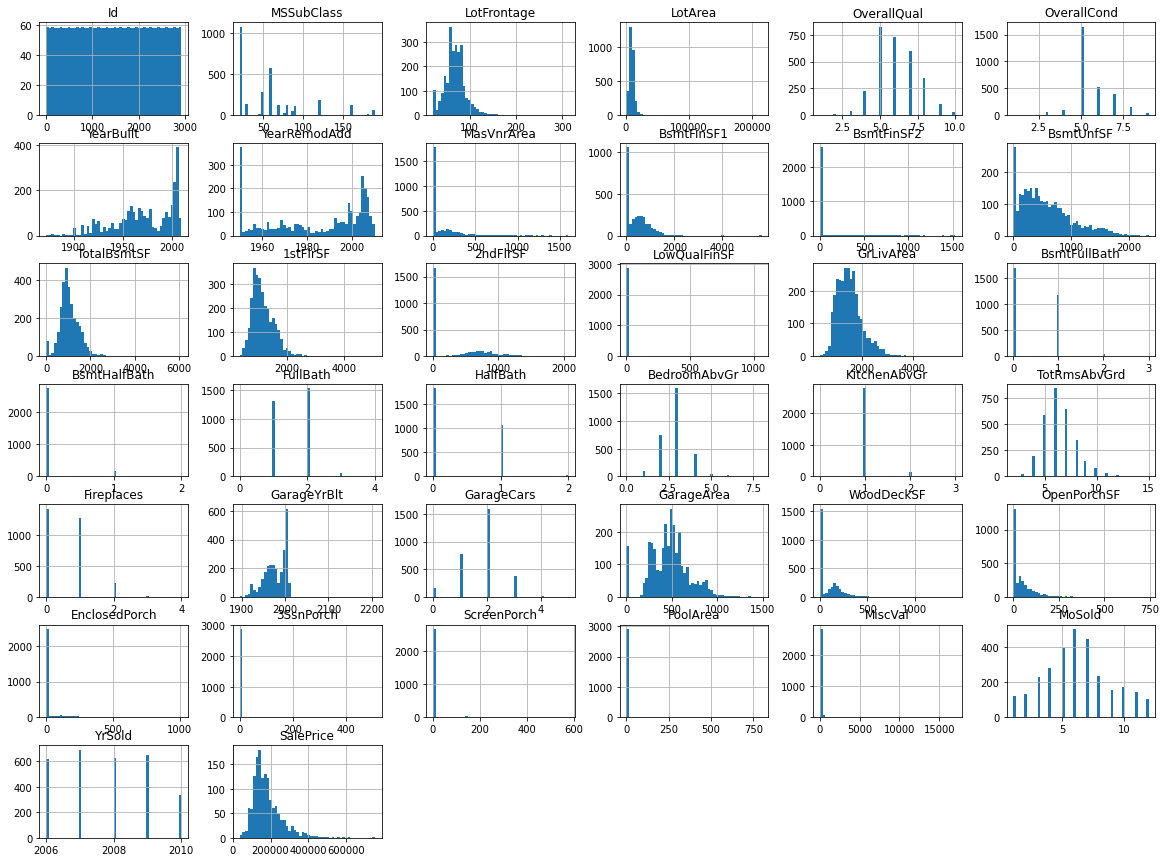

In [13]:
# Plotting histograms for the variables
%matplotlib inline
import matplotlib.pyplot as plt
input_data.hist(bins=50, figsize=(20,15))
plt.show()

# **Correlation**

In [14]:
correlation_matrix = input_data.corr()
correlation_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,0.018251,-0.014453,-0.024924,-0.008678,-0.022252,-0.037816,-0.029046,0.000145,0.010387,-0.009946,-0.015358,0.003074,-0.011702,-0.029368,-0.035236,-0.026666,-0.010208,-0.008865,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,-0.072530,-0.125994,-0.219965,-0.248641,0.309309,0.026482,0.071677,0.009950,-0.001878,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,0.087898,-0.046597,-0.103394,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,0.047431,0.113714,0.354822,0.458247,0.026545,0.004894,0.382462,0.113245,-0.025629,0.181668,0.039452,0.234892,0.004676,0.349513,0.261970,0.076673,0.310587,0.359786,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,0.084059,0.021362,0.254138,0.332460,0.031515,0.000554,0.284519,0.128349,0.026292,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,-0.008628,0.180434,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,-0.042771,0.275175,0.549294,0.479152,0.245596,-0.048393,0.575126,0.164543,-0.040732,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.571803,0.600744,0.565122,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,0.041501,-0.138202,-0.174002,-0.157418,0.005494,0.009048,-0.116569,-0.042133,0.084181,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.325849,-0.181787,-0.154149,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,-0.027595,0.130473,0.408515,0.310814,0.017588,-0.144191,0.242666,0.211580,-0.030282,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.834812,0.538074,0.480735,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,-0.062153,0.165175,0.298107,0.242245,0.158985,-0.060371,0.316972,0.134947,-0.046285,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.652365,0.426022,0.376765,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,-0.015645,0.090163,0.397240,0.395834,0.121014,-0.057912,0.402994,0.141593,0.015006,0.259777,0.191950,0.078126,-0.051389,0.278228,0.275195,0.255112,0.361190,0.374061,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.055045,-0.477404,0.536467,0.458092,-0.162301,-0.066028,0.211669,0.638847,0.078361,0.081525,-0.007311,-0.113547,-0.086354,0.052141,0.293089,0.194270,0.255482,0.310449,0.223492,0.124163,-0.099712,

In [15]:
print('Correlation Values are:\n', correlation_matrix["SalePrice"].sort_values(ascending=False))

Correlation Values are:
 SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0f6385c88>,
      dtype=object)

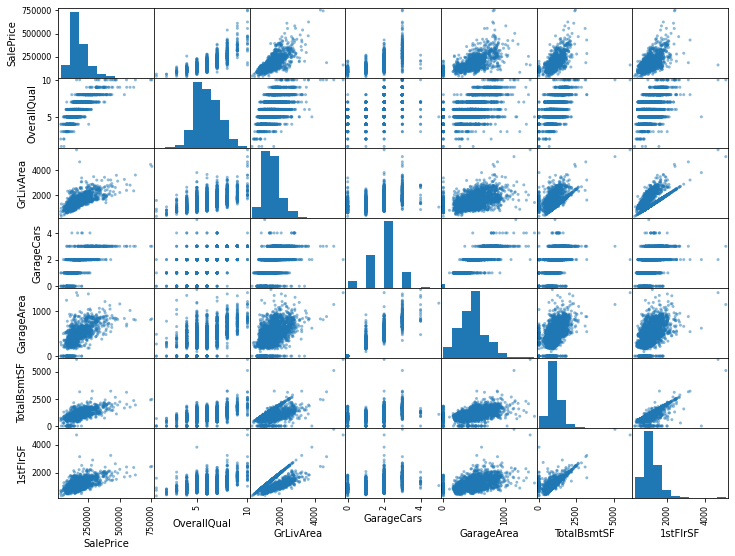

In [16]:
from pandas.plotting import scatter_matrix
new_columns = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF"]
scatter_matrix(input_data[new_columns], figsize=(12, 9))

# **Checking for Null Values**

In [17]:
print(input_data.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64


In [18]:
input_data.fillna(input_data.mean(), inplace = True)

In [19]:
print(input_data.isnull().sum())

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


# **Encoding Data**

In [20]:
from sklearn.preprocessing import LabelEncoder
cols = ('GarageCond', 'RoofStyle', 'LandContour',  'Electrical', 'RoofMatl', 'Heating', 'Foundation', 'MiscFeature', 'SaleType', 'GarageType', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for i in cols:
    end = LabelEncoder()
    end.fit(list(input_data[i].values))
    input_data[i] = end.transform(list(input_data[i].values))

In [21]:
x = input_data[input_data.columns[:80]]
y = input_data['SalePrice']

In [22]:
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, test_size=0.2)

# **Linear Regression**

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reg = LinearRegression()  
reg.fit(xtrain, ytrain)
values_predcited = reg.predict(xtest)

In [25]:
print("R-Square value of above linear Regression model : ", reg.score(xtrain,ytrain))

R-Square value of above linear Regression model :  0.44251802217513236


# **Prediction of Sale value**

In [30]:
sales_predict = pd.DataFrame(values_predcited, columns =['Predicted Sales'])
sales_predict

,Predicted Sales
0,250321.627114
1,240438.185374
2,161501.255865
3,234912.383179
4,139195.488146
...,...
579,147032.388209
580,231709.033867
581,156638.312384
582,223415.861355
